In [2]:
import earthaccess
import xarray as xr
from xarray.backends.api import open_datatree
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pl
import cartopy.crs as ccrs
import numpy as np

In [3]:
tspan = ("2024-07-07", "2024-08-07")
bbox = (-174.0, 22.0, -142.0, 34.0)

results = earthaccess.search_data(
    short_name="PACE_OCI_L3M_IOP_NRT",
    granule_name="*.DAY.*bb.4km.*",
    temporal=tspan,
    bounding_box=bbox,
)

bb_paths = earthaccess.open(results)

results = earthaccess.search_data(
    short_name="PACE_OCI_L3M_IOP_NRT",
    granule_name="*.DAY.*a.4km.*",
    temporal=tspan,
    bounding_box=bbox,
)

a_paths = earthaccess.open(results)
print(len(a_paths))


QUEUEING TASKS | :   0%|          | 0/31 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/31 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/31 [00:00<?, ?it/s]

QUEUEING TASKS | :   0%|          | 0/31 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/31 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/31 [00:00<?, ?it/s]

31


In [3]:
bb = xr.open_mfdataset(bb_paths, combine="nested", concat_dim="date", coords='minimal')
a = xr.open_mfdataset(a_paths, combine="nested", concat_dim="date", coords='minimal')


In [4]:
a_sub = a.sel({"lon": slice(-77, -75), "lat": slice(40, 35)})
a_sub_mean = a_sub.mean(dim=("lon", "lat")).compute()

bb_sub = bb.sel({"lon": slice(-77, -75), "lat": slice(40, 35)})
bb_sub_mean = bb_sub.mean(dim=("lon", "lat")).compute()

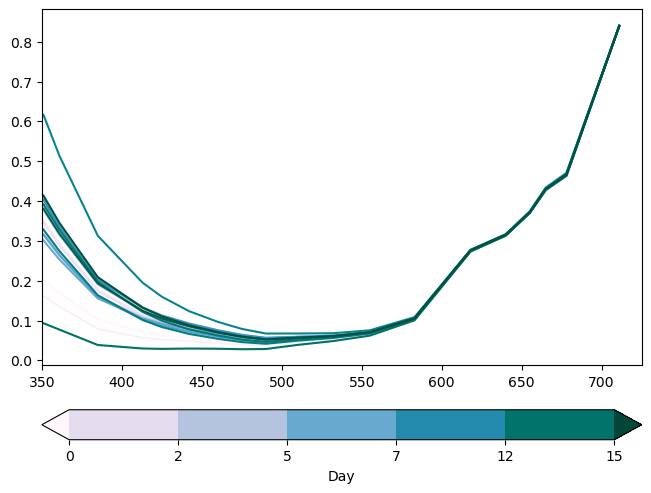

In [7]:
colors = pl.cm.PuBuGn(np.linspace(0,1,np.size(a_paths)))

cmap = mpl.cm.PuBuGn
bounds = [0, 2, 5, 7, 12, 15]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig, ax = plt.subplots(layout='constrained')
for i in range(len(a_paths)):
    plt.plot(a_sub_mean["wavelength"].values,a_sub_mean["a"].values[i], color=colors[i], label='%s day' % i)
    plt.xlim([350,725])
    #plt.ylim([-0.001,0.011])


fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax, orientation='horizontal',
             label="Day")
#plt.legend()

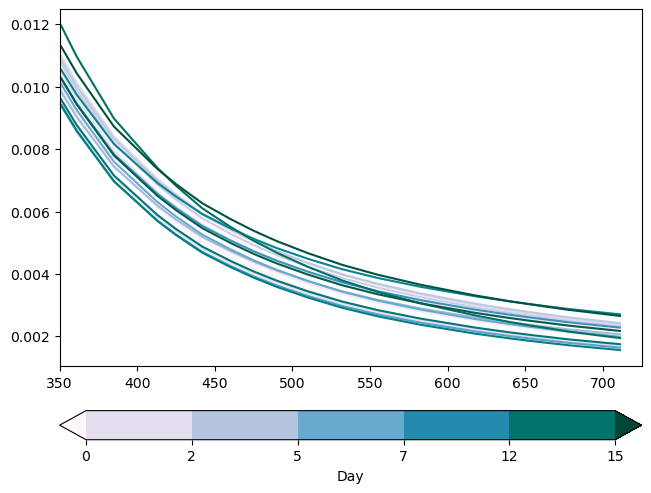

In [9]:
colors = pl.cm.PuBuGn(np.linspace(0,1,np.size(a_paths)))

cmap = mpl.cm.PuBuGn
bounds = [0, 2, 5, 7, 12, 15]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig, ax = plt.subplots(layout='constrained')
for i in range(len(a_paths)):
    plt.plot(bb_sub_mean["wavelength"].values,bb_sub_mean["bb"].values[i], color=colors[i], label='%s day' % i)
    plt.xlim([350,725])
    #plt.ylim([-0.001,0.011])


fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax, orientation='horizontal',
             label="Day")
#plt.legend()

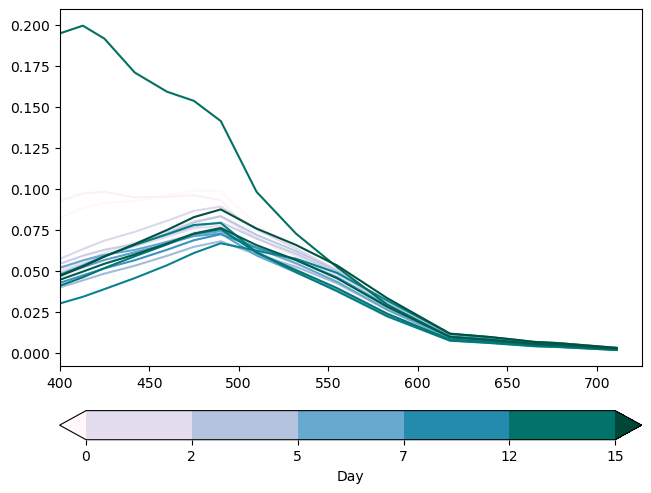

In [10]:
colors = pl.cm.PuBuGn(np.linspace(0,1,np.size(a_paths)))

cmap = mpl.cm.PuBuGn
bounds = [0, 2, 5, 7, 12, 15]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig, ax = plt.subplots(layout='constrained')
for i in range(len(a_paths)):
    plt.plot(a_sub_mean["wavelength"].values,bb_sub_mean["bb"].values[i]/(a_sub_mean["a"].values[i]+bb_sub_mean["bb"].values[i]), color=colors[i], label='%s day' % i)
    plt.xlim([400,725])
    #plt.ylim([-0.001,0.011])


fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax, orientation='horizontal',
             label="Day")
#plt.legend()

In [ ]:
#conda create -n jupyterlab-debugger -c conda-forge jupyterlab=3 "ipykernel>=6" xeus-python
#conda activate jupyterlab-debugger

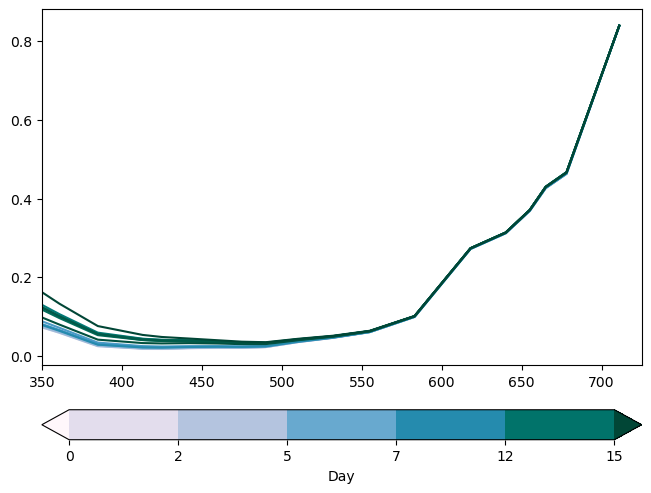

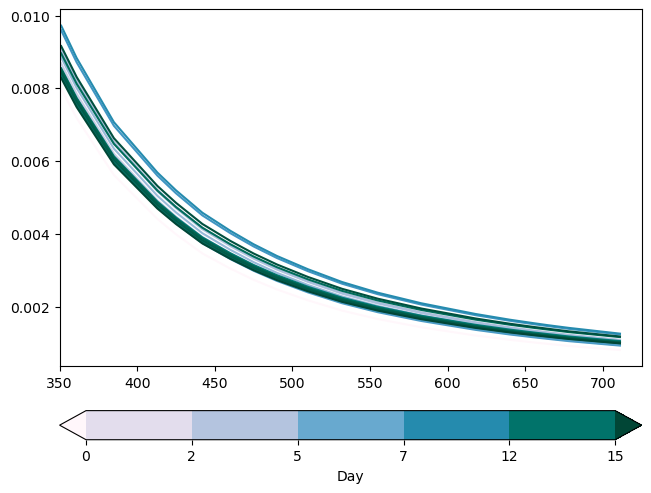

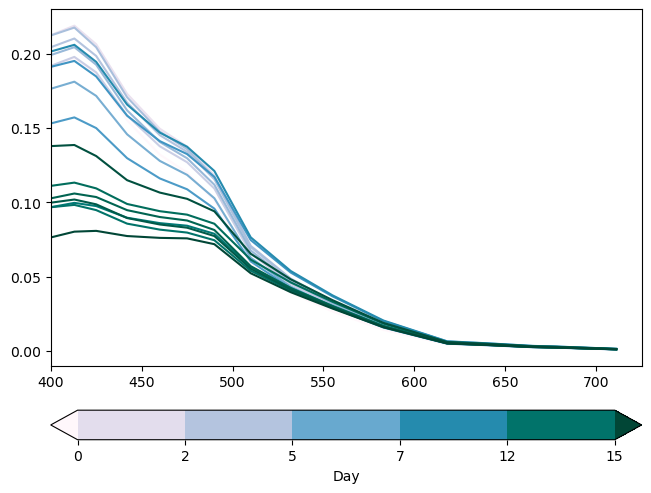

In [6]:
#(target area Hawaii: lat: 26N to 28N; lon: -159E to -157.5E)
bb = xr.open_mfdataset(bb_paths, combine="nested", concat_dim="date", coords='minimal')
a = xr.open_mfdataset(a_paths, combine="nested", concat_dim="date", coords='minimal')

a_sub = a.sel({"lon": slice(-159, -157.5), "lat": slice(28, 26)})
a_sub_mean = a_sub.mean(dim=("lon", "lat")).compute()

bb_sub = bb.sel({"lon": slice(-159, -157.5), "lat": slice(28, 26)})
bb_sub_mean = bb_sub.mean(dim=("lon", "lat")).compute()

colors = pl.cm.PuBuGn(np.linspace(0,1,np.size(a_paths)))

cmap = mpl.cm.PuBuGn
bounds = [0, 2, 5, 7, 12, 15]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

fig, ax = plt.subplots(layout='constrained')
for i in range(len(a_paths)):
    plt.plot(a_sub_mean["wavelength"].values,a_sub_mean["a"].values[i], color=colors[i], label='%s day' % i)
    plt.xlim([350,725])
    #plt.ylim([-0.001,0.011])


fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax, orientation='horizontal',
             label="Day")

colors = pl.cm.PuBuGn(np.linspace(0,1,np.size(a_paths)))

cmap = mpl.cm.PuBuGn
bounds = [0, 2, 5, 7, 12, 15]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
plt.savefig("a_Hawaii_avgd.png")

fig, ax = plt.subplots(layout='constrained')
for i in range(len(a_paths)):
    plt.plot(bb_sub_mean["wavelength"].values,bb_sub_mean["bb"].values[i], color=colors[i], label='%s day' % i)
    plt.xlim([350,725])
    #plt.ylim([-0.001,0.011])


fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax, orientation='horizontal',
             label="Day")

lors = pl.cm.PuBuGn(np.linspace(0,1,np.size(a_paths)))

cmap = mpl.cm.PuBuGn
bounds = [0, 2, 5, 7, 12, 15]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
plt.savefig("bb_Hawaii_avgd.png")

fig, ax = plt.subplots(layout='constrained')
for i in range(len(a_paths)):
    plt.plot(a_sub_mean["wavelength"].values,bb_sub_mean["bb"].values[i]/(a_sub_mean["a"].values[i]+bb_sub_mean["bb"].values[i]), color=colors[i], label='%s day' % i)
    plt.xlim([400,725])
    #plt.ylim([-0.001,0.011])


fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax, orientation='horizontal',
             label="Day")
plt.savefig("bb_abb_Hawaii_avgd.png")

In [12]:
len(a_paths)

27